In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data_df= pd.read_csv('/home/kavita/kavita/predictive analytics/BostonDataset.csv') 
df=data_df.drop('Unnamed: 0',axis=1)
y = data_df['medv']    

In [4]:
y.shape

(506,)

In [5]:
df.shape

(506, 14)

In [6]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [13]:
correlations_data = df.corr()['medv'].sort_values(ascending=False)
print(correlations_data)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


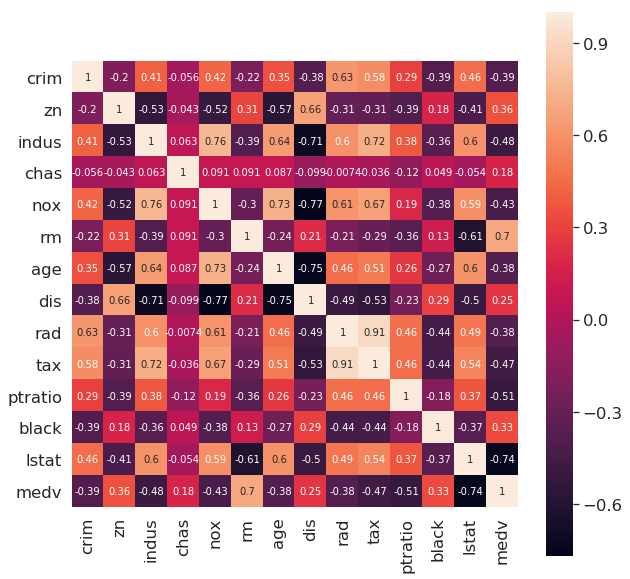

In [171]:
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

13


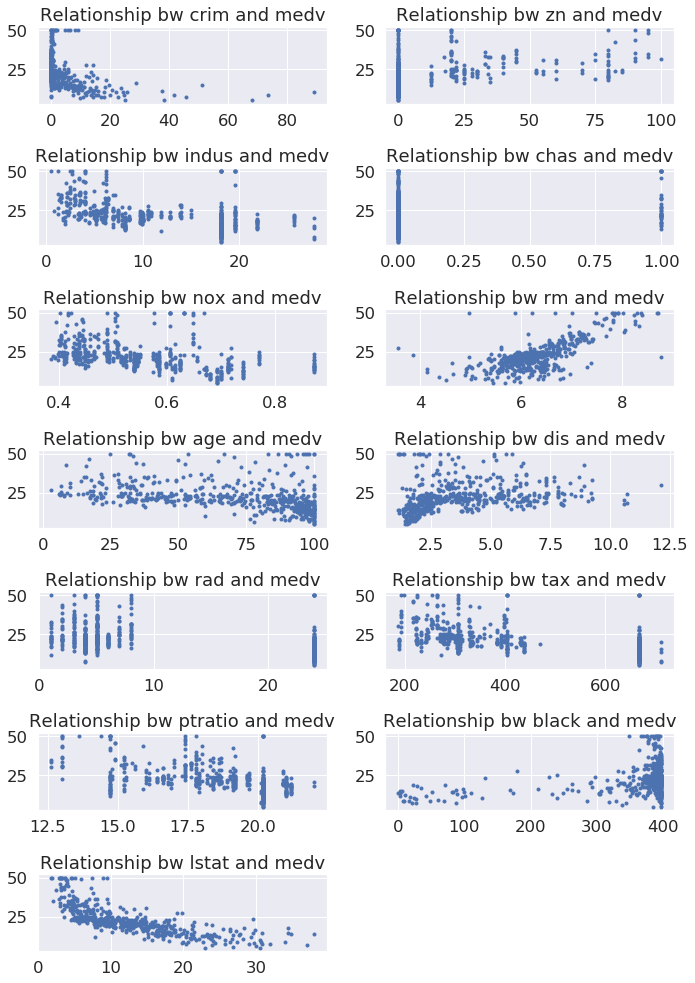

In [172]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],y,marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
colnames = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
plotFeatures(colnames,"Relationship bw %s and medv")

In [173]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
from sklearn.model_selection import train_test_split

features = df.drop(columns=['medv'])
targets = pd.DataFrame(df['medv'])
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [174]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11


In [175]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [176]:
# Intercept
print(lin_reg.intercept_)

[35.55487454]


In [177]:
# Slope or coefficients
print(lin_reg.coef_) 

[[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]


In [178]:
y_pred = (lin_reg.predict(X_test))

In [179]:
#  Variance score R2 value for training data
lin_reg.score(X_train, y_train)

0.7415244219726307

In [180]:
# Adjusted R^2 
adjusted_r_squared = 1 - (1-lin_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.7329085693717183

In [181]:
# calculate R Squared for testing data

y_pred = lin_reg.predict(X_test)
print('Linear Regression R squared": %.2f' % lin_reg.score(X_test, y_test))

Linear Regression R squared": 0.73


In [182]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3677909837965783
Mean Squared Error: 25.419587126821735
Root Mean Squared Error: 5.041784121402039


In [183]:
names = [i for i in list(df)]
lin_reg.coef_[0].tolist()

[-0.11596645190829587,
 0.04712492313362829,
 0.008259801462507429,
 3.234045310301108,
 -16.68658901913467,
 3.88410651465205,
 -0.01089744422872016,
 -1.5412954044120086,
 0.29320830875447806,
 -0.013405938287264205,
 -0.9062964291148599,
 0.008808234386811983,
 -0.45772384582140224]

In [184]:
pd.DataFrame(list((zip(names, lin_reg.coef_[0].tolist()))), columns = ['names', 'Coefficients'])

,names,Coefficients
0,crim,-0.115966
1,zn,0.047125
2,indus,0.008260
3,chas,3.234045
4,nox,-16.686589
5,rm,3.884107
6,age,-0.010897
7,dis,-1.541295
8,rad,0.293208
9,tax,-0.013406


There is a high correlation between rm and median price

<function matplotlib.pyplot.show(*args, **kw)>

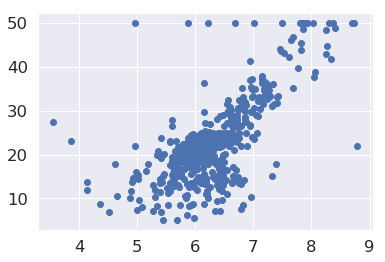

In [185]:
plt.scatter(df.rm,y)
plt.show

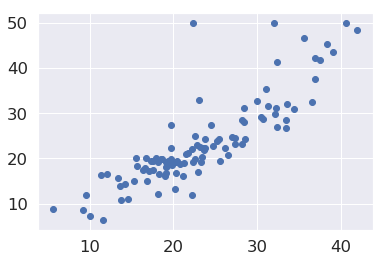

In [186]:
# plot of predicted and test 

plt.scatter(y_pred, y_test)

Text(0.5, 0, 'Fitted values')

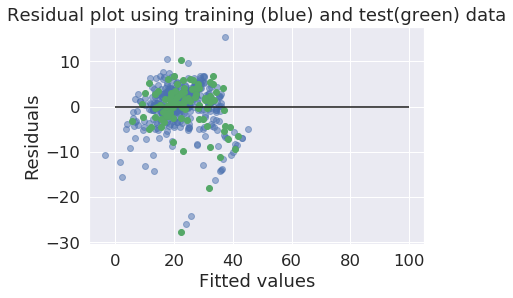

In [187]:
plt.scatter(lin_reg.predict(X_train), lin_reg.predict(X_train)-y_train, c= 'b', alpha = 0.5)
plt.scatter(lin_reg.predict(X_test), lin_reg.predict(X_test)-y_test, c= 'g')
plt.hlines(y = 0, xmin = 0, xmax = 100)
plt.title('Residual plot using training (blue) and test(green) data')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

In [188]:
## Finding p-values using statmodels

Xs = X_train.values
y = y_train.values

In [189]:
import statsmodels.api as sm 
X2 = sm.add_constant(Xs)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.07
Date:                Wed, 01 May 2019   Prob (F-statistic):          7.71e-106
Time:                        23:41:35   Log-Likelihood:                -1190.1
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5549      5.499      6.466      0.0

In [194]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [195]:
vif.round(1)

,VIF Factor,features
0,2.2,crim
1,2.9,zn
2,15.2,indus
3,1.2,chas
4,72.4,nox
5,76.2,rm
6,22.0,age
7,15.3,dis
8,16.0,rad
9,64.8,tax
